<a href="https://colab.research.google.com/github/ever-oli/MLby22/blob/main/TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Titanic dataset...
Dataset loaded: 891 rows, 15 columns.

Checking for missing values:
age            177
embarked         2
deck           688
embark_town      2
dtype: int64
----------------------------------------

Missing values handled.

Creating new logical features...
Features 'FamilySize' and 'IsAlone' created.

Training Random Forest Classifier...

Generating predictions and evaluating the model...

MODEL ACCURACY: 81.56%

CLASSIFICATION REPORT:
                 precision    recall  f1-score   support

Did Not Survive       0.81      0.90      0.85       105
       Survived       0.84      0.69      0.76        74

       accuracy                           0.82       179
      macro avg       0.82      0.80      0.80       179
   weighted avg       0.82      0.82      0.81       179



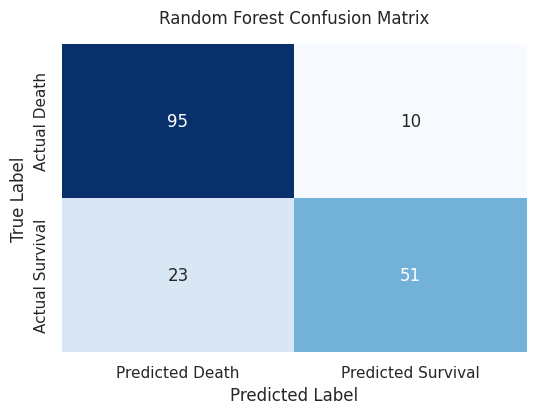

In [2]:
# TITANIC SURVIVAL PREDICTION: FEATURE ENGINEERING & RANDOM FOREST
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set visualization style
sns.set_theme(style="whitegrid")

# Data Loading

print("Loading Titanic dataset...")
# Seaborn has the Titanic dataset built-in
df = sns.load_dataset('titanic')

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns.\n")


# Handling Missing Data

print("Checking for missing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print("-" * 40)

# The 'deck' (or cabin) column has too many missing values to be useful directly, so we drop it.
# We also drop 'alive' as it is redundant with 'survived'.
df.drop(columns=['deck', 'alive'], inplace=True)

# 'age' has missing values. We will impute these using the median age.
df['age'] = df['age'].fillna(df['age'].median())

# 'embarked' and 'embark_town' have a couple of missing values. We fill them with the mode.
mode_embarked = df['embarked'].mode()[0]
df['embarked'] = df['embarked'].fillna(mode_embarked)
df.drop(columns=['embark_town'], inplace=True) # Redundant with 'embarked'

print("\nMissing values handled.\n")

# 3. Feature Engineering

print("Creating new logical features...")

# Feature 1: Family Size
# Combine siblings/spouses (sibsp) and parents/children (parch) plus the passenger themselves
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

# Feature 2: Is Alone
# Binary feature indicating if the passenger is traveling completely alone
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

print("Features 'FamilySize' and 'IsAlone' created.\n")


# 4. Data Preprocessing for Modeling

# Random Forest requires numerical inputs, so we encode categorical variables using one-hot encoding
features = ['pclass', 'sex', 'age', 'fare', 'embarked', 'FamilySize', 'IsAlone']
X = pd.get_dummies(df[features], drop_first=True)
y = df['survived']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. Model Training (Random Forest)

print("Training Random Forest Classifier...")
# Initialize the model with 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

# Fit the model on the training data
rf_model.fit(X_train, y_train)


# 6. Evaluation Metrics

print("\nGenerating predictions and evaluating the model...\n")
y_pred = rf_model.predict(X_test)

# Calculate base accuracy
accuracy = accuracy_score(y_test, y_pred)
print("=" * 40)
print(f"MODEL ACCURACY: {accuracy * 100:.2f}%")
print("=" * 40 + "\n")

# Detailed Classification Report
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived']))

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Death', 'Predicted Survival'],
            yticklabels=['Actual Death', 'Actual Survival'])
plt.title('Random Forest Confusion Matrix', pad=15)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()